## Ejecución de codigo kata 10

1) abrir un archivo inexistente sucede lo siguiente:

In [1]:
open("/path/to/mars.jpg")

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/mars.jpg'

2) Ejecútala con Python y podrás comprobar el siguiente mensaje de error:

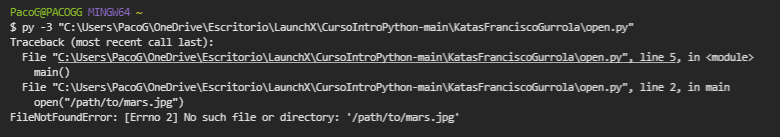

In [4]:
from IPython.display import Image, display;   
display(Image(filename='resources/ev_uno.png'))

3) Si queremos controlar esa excepción, podemos hacerlo con un bloque try y except:

In [5]:
try:
    open('config.txt')
except FileNotFoundError:
    print("Couldn't find the config.txt file!")

Couldn't find the config.txt file!


4) Para comprender por qué detectar todas las excepciones es problemático, probaremos actualizando la función main():

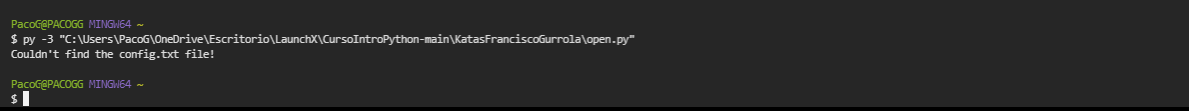

In [6]:
from IPython.display import Image, display;   
display(Image(filename='resources/ev_dos.png'))

5) Vamos a corregir este fragmento de código para abordar todas estas frustraciones. Revertiremos la detección de `FileNotFoundError` y luego agregamos otro bloque `except` para detectar `PermissionError`:

In [8]:
def main():
    try:
        configuration = open('config.txt')
    except FileNotFoundError:
        print("Couldn't find the config.txt file!")
    except IsADirectoryError:
        print("Found config.txt but it is a directory, couldn't read it")

6) Si necesitas acceder al error asociado a la excepción, debes actualizar la línea `except` para incluir la palabra clave `as`. Esta técnica es práctica si una excepción es demasiado genérica y el mensaje de error puede ser útil:

In [9]:
try:
    open("mars.jpg")
except FileNotFoundError as err:
    print("got a problem trying to read the file:", err)

got a problem trying to read the file: [Errno 2] No such file or directory: 'mars.jpg'


7) En este caso, `as err` significa que `err` se convierte en una variable con el objeto de excepción como valor. Después, usa este valor para imprimir el mensaje de error asociado a la excepción. Otra razón para usar esta técnica es acceder directamente a los atributos del error. Por ejemplo, si detecta una excepción `OSError` más genérica, que es la excepción primaria de `FilenotFoundError` y `PermissionError`, podemos diferenciarlas mediante el atributo `.errno`:

In [10]:
try:
    open("config.txt")
except OSError as err:
    if err.errno == 2:
        print("Couldn't find the config.txt file!")
    elif err.errno == 13:
        print("Found config.txt but couldn't read it")

Couldn't find the config.txt file!


8) Vamos a crear una función que, con base al número de astronautas, pueda calcular la cantidad de agua quedará después de un día o más

In [11]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    return f"Total water left after {days_left} days is: {total_water_left} liters"

9) PruProbemos con cinco astronautas, 100 litros de agua sobrante y dos días:

In [12]:
water_left(5, 100, 2)

'Total water left after 2 days is: -10 liters'

10) Esto no es muy útil, ya que una carencia en los litros sería un error. Después, el sistema de navegación podría alertar a los astronautas que no habrá suficiente agua para todos en dos días. Si eres un ingeniero(a) que programa el sistema de navegación, podrías generar una excepción en la función water_left() para alertar de la condición de error:

In [15]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    if total_water_left < 0:
        raise RuntimeError(f"There is not enough water for {astronauts} astronauts after {days_left} days!")
    return f"Total water left after {days_left} days is: {total_water_left} liters"

11) Ahora volvemos a ejecutarlo

In [16]:
water_left(5, 100, 2)

RuntimeError: There is not enough water for 5 astronauts after 2 days!

11) En el sistema de navegación, el código para señalar la alerta ahora puede usar RuntimeError para generar la alerta:

In [17]:
try:
    water_left(5, 100, 2)
except RuntimeError as err:
    alert_navigation_system(err)

NameError: name 'alert_navigation_system' is not defined

12) El error de TypeError no es muy descriptivo en el contexto de lo que espera la función. Actualizaremos la función para que use TypeError, pero con un mensaje mejor:

In [20]:
def water_left(astronauts, water_left, days_left):
    for argument in [astronauts, water_left, days_left]:
        try:
            # If argument is an int, the following operation will work
            argument / 10
        except TypeError:
            # TypError will be raised only if it isn't the right type 
            # Raise the same exception but with a better error message
            raise TypeError(f"All arguments must be of type int, but received: '{argument}'")
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    if total_water_left < 0:
        raise RuntimeError(f"There is not enough water for {astronauts} astronauts after {days_left} days!")
    return f"Total water left after {days_left} days is: {total_water_left} liters"

13) Ahora volvemos a intentarlo para obtener un error mejor:

In [21]:
water_left("3", "200", None)

TypeError: All arguments must be of type int, but received: '3'